In [8]:
import os
def main():
    
    # Create directory
    dirName = 'kaggle_bee_vs_wasp'
    
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")        
    
        
dirName = 'bees&wasps/train/bees'
    
    # Create target directory & all intermediate directories if don't exists
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists") 
        
dirName = 'bees&wasps/train/wasps'
    
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists")   
    
dirName = 'bees&wasps/test/bees'
    
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists")   
    
dirName = 'bees&wasps/test/wasps'
    
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists")   
        
dirName = 'bees&wasps/validation/bees'
    
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists")   
    
dirName = 'bees&wasps/validation/wasps'
    
try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
except FileExistsError:
        print("Directory " , dirName ,  " already exists")   
       
if __name__ == '__main__':
    main()

Directory  bees&wasps/train/bees  already exists
Directory  bees&wasps/train/wasps  already exists
Directory  bees&wasps/test/bees  already exists
Directory  bees&wasps/test/wasps  already exists
Directory  bees&wasps/validation/bees  already exists
Directory  bees&wasps/validation/wasps  already exists
Directory  kaggle_bee_vs_wasp  already exists


In [9]:
import os
import shutil
import random
from shutil import copyfile
path=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\kaggle_bee_vs_wasp\bee1'
dest1=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\train\bees'
dest2=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\test\bees'
dest3=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\validation\bees'
files=os.listdir(path)
for i, f in enumerate(files):
    x = (i + 1) / len(files)
    if x > 0.7:
        shutil.copy(os.path.join(path, f),dest2)
    elif x > 0.5 and x < 0.6:
        shutil.copy(os.path.join(path, f), dest3)
    else:
        shutil.copy(os.path.join(path, f),dest1)


path=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\kaggle_bee_vs_wasp\wasp1'
dest1=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\train\wasps'
dest2=r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\test\wasps'
dest3 = r'C:\Users\Mirela\PycharmProjects\Computer_Vision\bees&wasps\validation\wasps'
files=os.listdir(path)
for i, f in enumerate(files):
    x = (i + 1) / len(files)
    if x > 0.7:
        shutil.copy(os.path.join(path, f),dest2)
    elif x > 0.5 and x < 0.6:
        shutil.copy(os.path.join(path, f), dest3)
    else:
        shutil.copy(os.path.join(path, f),dest1)


#  Lets count how many pictures are there in each data set
print("Total training bee images", len(os.listdir("bees&wasps/train/bees")))
print("Total training wasp images", len(os.listdir("bees&wasps/train/wasps")))
print("Total validation bee images", len(os.listdir("bees&wasps/validation/bees")))
print("Total validation wasp images", len(os.listdir("bees&wasps/validation/wasps")))
print("Total test bee images", len(os.listdir("bees&wasps/test/bees")))
print("Total test wasp images", len(os.listdir("bees&wasps/test/wasps")))


Total training bee images 1481
Total training wasp images 1275
Total validation bee images 247
Total validation wasp images 213
Total test bee images 741
Total test wasp images 639


In [11]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

# Creating the convnet model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [13]:
optimizer = 'rmsprop'
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['acc'])

In [14]:
# Data Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_dir = 'bees&wasps/train'
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150,150),
batch_size = 20,
class_mode = 'binary')
validation_dir ='bees&wasps/validation'
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150,150),
batch_size = 20,
class_mode = 'binary')

Found 2756 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [15]:
# Lets look at the output of one of these generators

for data_batch, lables_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('lables batch shape;', lables_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
lables batch shape; (20,)


In [17]:
# Model Training begins here
# Since we are using Data Generators, rather than static data sets, we would be using fit_generator to fit the data rather than traditional fit function

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs = 15,
validation_data=validation_generator,
validation_steps = 50)

Epoch 1/15
100/100 [==============================] - 52s 518ms/step - loss: 0.6852 - acc: 0.6060 - val_loss: 0.6483 - val_acc: 0.6850
Epoch 2/15
100/100 [==============================] - 55s 551ms/step - loss: 0.6136 - acc: 0.6979 - val_loss: 0.6167 - val_acc: 0.6730
Epoch 3/15
100/100 [==============================] - 55s 548ms/step - loss: 0.5791 - acc: 0.7234 - val_loss: 0.5025 - val_acc: 0.7250
Epoch 4/15
100/100 [==============================] - 52s 524ms/step - loss: 0.5461 - acc: 0.7560 - val_loss: 0.7436 - val_acc: 0.7260
Epoch 5/15
100/100 [==============================] - 54s 539ms/step - loss: 0.5258 - acc: 0.7685 - val_loss: 0.4763 - val_acc: 0.7710
Epoch 6/15
100/100 [==============================] - 56s 562ms/step - loss: 0.4778 - acc: 0.7886 - val_loss: 0.5513 - val_acc: 0.7590
Epoch 7/15
100/100 [==============================] - 55s 551ms/step - loss: 0.4578 - acc: 0.8106 - val_loss: 1.1157 - val_acc: 0.7750
Epoch 8/15
100/100 [==============================] - 5

In [18]:
# Saving the model post training

model.save('bees_and_wasps')

<Figure size 432x288 with 0 Axes>

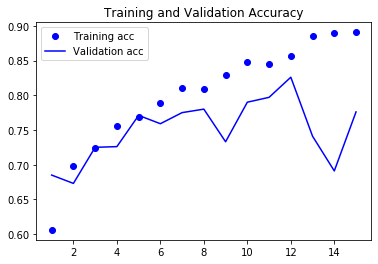

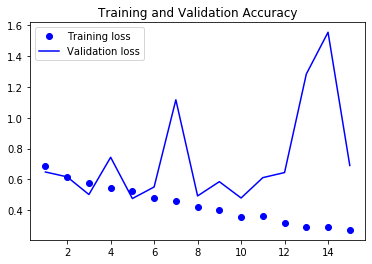

<Figure size 432x288 with 0 Axes>

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Plotting
# Lets plot the loss and accuracy of the model over the training and validation data during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

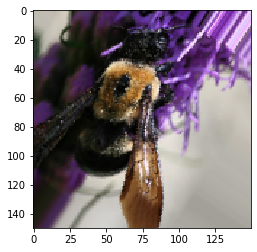

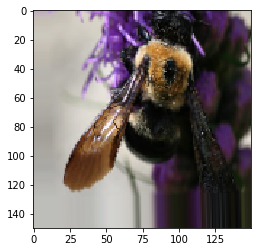

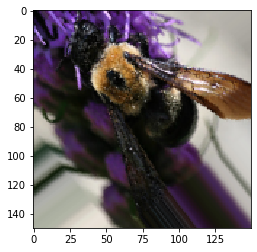

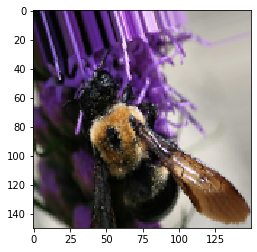

In [25]:
# Lets take an example and see how does the image augmentation works
train_bees_dir = 'bees&wasps/train/bees'
fnames = [os.path.join(train_bees_dir, fnames) for fnames in os.listdir(train_bees_dir)]

datagen = ImageDataGenerator(
rotation_range = 40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [26]:
# Re creating the model with added drop out layer
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
optimizer = 'rmsprop'
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['acc'])

In [ ]:
# Lets train the network using data augmentation and dropout

train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255) # Please note that the validation data set is not being augmented. Its just being rescaled

# Passing the training directory to Image Data Generator constructor
train_generator=train_datagen.flow_from_directory(
train_dir,
target_size = (150,150),
batch_size=32,
class_mode='binary')

# Passing the test directory to its corresponding image pre processing constructor, just like the training data set
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')

# Fitting the model
history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=20,
validation_data = validation_generator,
validation_steps = 50)

In [ ]:
# Saving the model post training

model.save('bees_and_wasps_v2')

<Figure size 432x288 with 0 Axes>

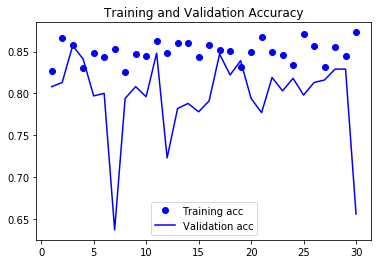

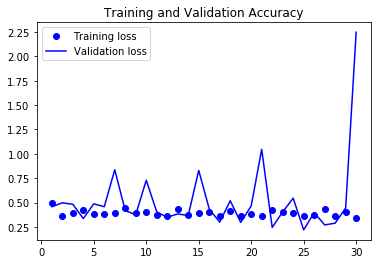

<Figure size 432x288 with 0 Axes>

In [35]:
# Plotting the results of the new network

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

In [ ]:
# I will be using VGG16 network for feature extraction
# Lets instantiate the VGG16 model

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

In [ ]:
# Instantiating an ImageDataGenerator intance for recaling the images
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20
train_dir = 'bees&wasps/train'
test_dir = 'bees&wasps/test'
validation_dir = 'bees&wasps/validation'

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Calling the extract features function on the training, validation and test directory

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [ ]:
train_features = np.reshape(train_features,(2000, 4*4*512))
validation_features = np.reshape(validation_features,(1000, 4*4*512))
test_features = np.reshape(test_features,(1000, 4*4*512))

In [ ]:
# Defining and training the densely connected classifier

model = models.Sequential()
model.add(layers.Dense(256,activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation = 'sigmoid'))

optimizer = 'rmsprop'
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['acc'])


history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (validation_features, validation_labels))

In [ ]:
# Plotting the results of the new network

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
print("The number of trainable weights before freezing the convolutional layer = ",len(model.trainable_weights))

In [ ]:
# Freezing the conv base
conv_base.trainable = False

In [ ]:
print("The number of trainable weights post freezing the convolutional layer", len(model.trainable_weights))

In [31]:
# We can start training the model with the data augmentation which we used previously
train_dir = 'bees&wasps/train'
test_dir = 'bees&wasps/test'
validation_dir = 'bees&wasps/validation'

train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=40,
height_shift_range=0.2,
width_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(
rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150,150),
batch_size=20,
class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

optimizer = 'rmsprop'
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2756 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 30s 605ms/step - loss: 0.4998 - acc: 0.8263 - val_loss: 0.4570 - val_acc: 0.8080
Epoch 2/30
50/50 [==============================] - 30s 596ms/step - loss: 0.3612 - acc: 0.8660 - val_loss: 0.4971 - val_acc: 0.8130
Epoch 3/30
50/50 [==============================] - 30s 607ms/step - loss: 0.3943 - acc: 0.8580 - val_loss: 0.4826 - val_acc: 0.8570
Epoch 4/30
50/50 [==============================] - 30s 606ms/step - loss: 0.4211 - acc: 0.8303 - val_loss: 0.3353 - val_acc: 0.8410
Epoch 5/30
50/50 [==============================] - 32s 632ms/step - loss: 0.3812 - acc: 0.8480 - val_loss: 0.4870 - val_acc: 0.7970
Epoch 6/30
50/50 [==============================] - 30s 603ms/step - loss: 0.3793 - acc: 0.8440 - val_loss: 0.4574 - val_acc: 0.8000
Epoch 7/30
50/50 [==============================] - 31s 611ms/step - loss: 0.3904 - acc: 0.8534 - val_loss: 0.8368 - va

In [ ]:
# Plotting the results of the new network

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

In [ ]:
# Freezing all layers upto a specific one 

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable == True
    else:
        layer.trainable == False

In [ ]:
# Recompiling the model
optimizer = 'rmsprop'
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['acc'])

history = model.fit_generator(
train_generator,
epochs=20,
steps_per_epoch=50,
validation_data=validation_generator,
validation_steps=50)

In [ ]:
# Writing a smoothening function to smoothen the output plots

def smooth_curve(points, factor = 0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous_point = smoothed_points[-1]
            smoothed_points.append(previous_point*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [ ]:
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Testing the model on Test data
test_dir = 'bees&wasps/test'
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)